In [139]:
import os
import numpy as np

polynomial_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'polynomial_trainable')
arr = 0
for path, directories, files in os.walk(polynomial_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        polynomial_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        polynomial_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        
linear_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'linear_trainable')
arr = 0
for path, directories, files in os.walk(linear_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        linear_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        linear_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        

found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_learning_rates.npy


In [137]:
#final_results/5_epochs_fashion_mnist/

import os
import numpy as np

def get_np_array(path, file):
    return np.load(os.path.join(path, file))

fashion_mnist_5_epochs_path = os.path.join(os.getcwd(),'final_results/5_epochs_fashion_mnist')

polynomial_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_polynomial_trainable.npy')
polynomial_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 
                                         'numpy_learning_rates_polynomial_trainable.npy')

linear_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_linear.npy')
linear_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 'numpy_learning_rates_linear.npy')

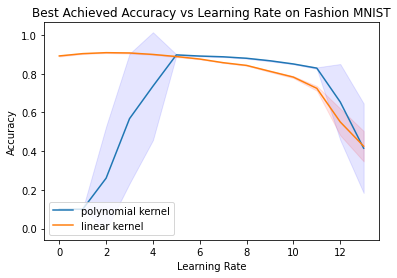

In [140]:
from matplotlib import pyplot as plt
import numpy as np
import math


def get_confidence_interval_and_mean(y):
    confidence_interval = 1.96 * np.std(y, axis=0)/math.sqrt(y.shape[0])
    mean = np.mean(y, axis=0)
    return confidence_interval, mean

polynomial_ci, polynomial_mean = get_confidence_interval_and_mean(polynomial_accuracies)

linear_ci, linear_mean = get_confidence_interval_and_mean(linear_accuracies)
x = np.array(list(range(polynomial_accuracies.shape[1])))
fig, ax = plt.subplots()
ax.plot(x,polynomial_mean)
ax.fill_between(x, (polynomial_mean-polynomial_ci), (polynomial_mean+polynomial_ci), color='b', alpha=.1)
ax.plot(x,linear_mean)
ax.fill_between(x, (linear_mean-linear_ci), (linear_mean+linear_ci), color='r', alpha=.1)

plt.title('Best Achieved Accuracy vs Learning Rate on Fashion MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(['polynomial kernel', 'linear kernel'], loc='lower left')
plt.savefig(os.path.join(os.getcwd(), "fashion_mnist.jpg"),pil_kwargs={'quality':95}, dpi=300)
plt.show()


In [227]:
def get_columns_indices_with_no_zeros(arr):
    columns_to_include = []
    for column in range(arr.shape[1]):
        include_column = True
        for row in range(arr.shape[0]):
            if arr[row,column] == 0:
                include_column = False
        if include_column == True:
            columns_to_include.append(column)
    return columns_to_include

def generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, 
                    file_to_save, x_label, y_label, is_convergence=False, legend_loc='upper right'):
    list_of_raw_data = []
    for file_name in list_of_file_names:
        list_of_raw_data.append(get_np_array(path_to_files, file_name))
        
    learning_rates = get_np_array(path_to_files, learning_rates_file)
    learning_rates = learning_rates[0]
    
    list_of_formatted_data_to_plot = []
    for raw_data in list_of_raw_data:
        list_of_formatted_data_to_plot.append(get_confidence_interval_and_mean(raw_data))
        
    fig, ax = plt.subplots()
    ax.set_xscale('log',base=2)
    
    for i in range(len(list_of_formatted_data_to_plot)):
        x = learning_rates
        ci, mean = list_of_formatted_data_to_plot[i]
        print(mean)
        if is_convergence:
            columns_with_no_zeros = get_columns_indices_with_no_zeros(list_of_raw_data[i])
            x = x[columns_with_no_zeros]
            ci = ci[columns_with_no_zeros]
            mean = mean[columns_with_no_zeros]
        ax.plot(x,mean)
        ax.fill_between(x, (mean+ci), (mean-ci), alpha=.1)

    plt.title(fig_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend(fig_legend, loc=legend_loc)
    plt.savefig(os.path.join(os.getcwd(), file_to_save),pil_kwargs={'quality':95}, dpi=300)
    plt.show()
    

# MNIST results

[0.11252857 0.11252857 0.11252857 0.11252857 0.49887142 0.98982856
 0.98887142 0.98832858 0.98618573 0.98448571]
[0.79174285 0.98924286 0.99147142 0.99187143 0.99100001 0.99015714
 0.98871428 0.9858     0.98131429 0.97384286]


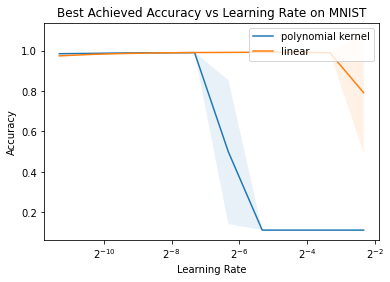

In [228]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','linear/numpy_accuracies.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'linear']
file_to_save = "mnist_test.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, x_label, y_label)

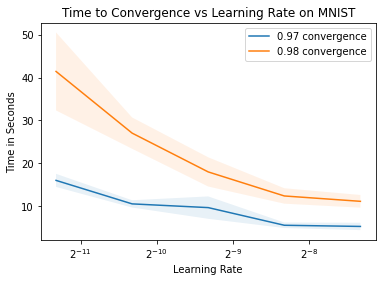

In [225]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/polynomial_trainable')
list_of_file_names = ['numpy_target_convergence_97.npy','numpy_target_convergence_98.npy']
learning_rates_file = 'numpy_learning_rates.npy'
fig_title = 'Time to Convergence vs Learning Rate on MNIST'
fig_legend = ['0.97 convergence','0.98 convergence']
file_to_save = "mnist_time_test.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence)

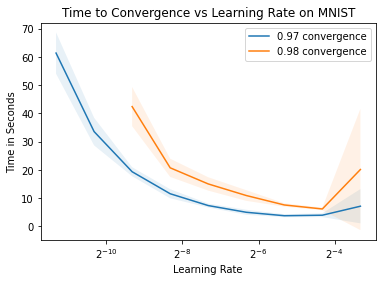

In [226]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/linear')
list_of_file_names = ['numpy_target_convergence_97.npy','numpy_target_convergence_98.npy']
learning_rates_file = 'numpy_learning_rates.npy'
fig_title = 'Time to Convergence vs Learning Rate on MNIST'
fig_legend = ['0.97 convergence','0.98 convergence']
file_to_save = "mnist_time_test.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence)

# Fashion MNIST results

[0.88784286 0.90415713 0.91664286 0.92222857 0.92269999 0.91858572
 0.91251429 0.90174285 0.88857144 0.86862856]
[0.88784286 0.90415713 0.91664286 0.92222857 0.92269999 0.91858572
 0.91251429 0.90174285 0.88857144 0.86862856]


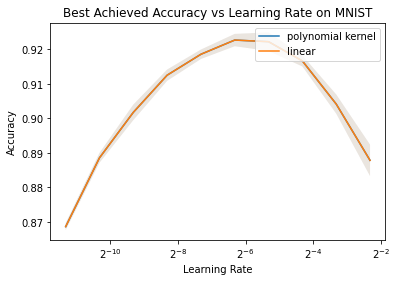

In [230]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['linear/numpy_accuracies.npy','linear/numpy_accuracies.npy']
learning_rates_file = 'linear/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'linear']
file_to_save = "mnist_test.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, x_label, y_label)

[0.1        0.1        0.10121429 0.1        0.58311428 0.9069
 0.90767142 0.90830001 0.90435715 0.9003857 ]
[0.1        0.1        0.10121429 0.1        0.58311428 0.9069
 0.90767142 0.90830001 0.90435715 0.9003857 ]


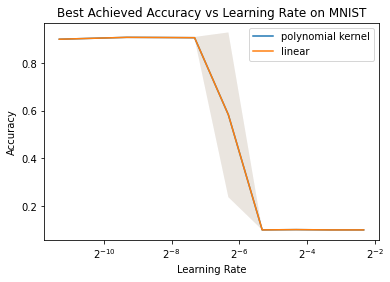

In [233]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','polynomial_trainable/numpy_accuracies.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'linear']
file_to_save = "mnist_test.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, x_label, y_label)